In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#데이터 가져오기
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images,test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover','Dress','Coat',
                'Sandal','Shirt','Sneaker','Bag','Ankle Boot']
class_names[train_labels[51]]

'Dress'

In [4]:
train_images.shape, test_images.shape #28x28 image

((60000, 28, 28), (10000, 28, 28))

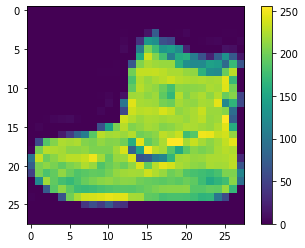

In [5]:
#이미지 전처리

plt.figure
plt.imshow(train_images[0]) 
plt.colorbar()

In [6]:
train_images = train_images / 255.0 #0~250 에서 0~1로 nomalize
test_images = test_images / 255.0

# plt.figure(figsize = (10,10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.imshow(train_images[i], cmap=plt.cm.binary) 
#     plt.xlabel(class_names[train_labels[i]])

In [7]:
#모델 구성

inputs = keras.Input(shape = (28,28))
h = layers.Flatten()(inputs) #28x28 을 일차원의 행렬로 바꿔줌
h = layers. Dense(128)(h)
h = layers.Activation('relu')(h)
outputs = layers.Dense(10)(h) # 점수가 아닌 10가지의 클래스로 분류 -> 각 클래스마다 점수를 부여
outputs = layers.Activation('softmax')(outputs)

model= keras.Model(inputs=inputs,outputs=outputs)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_______________________________________________________

In [8]:
#컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #이미지에서는 꼭 이걸로 해주어야 함!!
              metrics=['accuracy'])

In [ ]:
#모델 훈련

EPOCHS = 10 # 1epoch = 모든 데이터 1바퀴

model.fit(
    train_images, 
    train_labels , 
    epochs=5 ,  
    validation_split = 0.1 #과적합 여부 판단을 위해 분리해놓은 데이터
)


In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

10000/1 - 2s - loss: 0.4354 - accuracy: 0.8284


In [13]:
predictions = model.predict(test_images)
predictions

array([[5.4720260e-07, 9.5833474e-09, 3.4073946e-06, ..., 9.1459662e-02,
        7.3958008e-04, 6.8369168e-01],
       [4.6280889e-05, 9.2403901e-08, 9.8671770e-01, ..., 2.0886742e-15,
        9.4839907e-06, 4.1935437e-17],
       [3.4361772e-05, 9.9993181e-01, 1.0558941e-05, ..., 5.8419068e-11,
        1.3601772e-07, 3.0373774e-12],
       ...,
       [1.0521902e-01, 2.1219238e-07, 4.2850003e-03, ..., 3.7385521e-06,
        4.4971371e-01, 7.6833579e-09],
       [1.1280880e-06, 9.9973291e-01, 1.3114784e-06, ..., 2.7966520e-08,
        2.8475821e-08, 5.2280961e-07],
       [4.2549866e-05, 4.8794200e-06, 2.3482375e-04, ..., 6.8701385e-03,
        3.1157325e-03, 2.4396299e-04]], dtype=float32)

In [14]:
np.argmax(predictions[0])

9

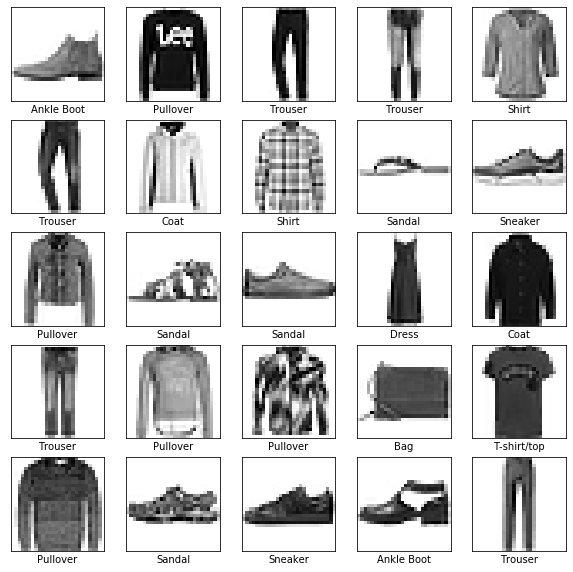

In [15]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i], cmap=plt.cm.binary) 
    plt.xlabel(class_names[np.argmax(predictions[i])])